<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/CentralitiesZachary1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Centrality Metrics in Zachary's Karate Club Network
### Degree, Closeness, and Betweenness (Nodes and Edges)

In this section we illustrate several **structural importance (centrality) metrics** on a classic social network: **Zachary's Karate Club**.

Our goals are to compute and visualize:

### Node-level centralities
- **Degree centrality** (local popularity)
- **Closeness centrality** (global reach via shortest paths)
- **Node betweenness centrality** (brokerage on shortest-path traffic)

### Edge-level centralities
- **Edge betweenness centrality** (edges that frequently lie on shortest paths)
- **Flow-based edge centrality** (edges that carry large amounts of traffic when flow can be routed along multiple paths)

Flow-based centrality complements shortest-path betweenness: it accounts for the
fact that traffic can split across routes and avoid bottlenecks, which is often
more realistic in transportation, communication, and infrastructure networks.

### Why use Zachary's Karate Club?
This network is small enough to visualize clearly, but rich enough to show
meaningful differences between centrality measures. It is also historically
important in network science.

### Consistent node positioning
To make comparisons fair across plots, we will use the **same node positions**
in every visualization. We will compute node coordinates once using the
**spring layout** (a force-directed layout):

- nodes that are strongly connected tend to be placed closer,
- loosely connected parts of the network tend to separate visually.

By reusing the same layout in every plot, differences in appearance will reflect
**differences in centrality values**, not changes in the drawing.

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()

# Get positions for the nodes in the graph
pos = nx.spring_layout(G)

## A reusable visualization helper: centrality as color and size

To compare centrality measures visually, we will define a helper function that draws a graph where:

- **node color** reflects the centrality value (darker/brighter = more central),
- **node size** reflects the centrality value (larger = more central).

Because raw centrality values can have very different numerical scales (and can be highly skewed),
we first **normalize** them to a common range and then map them to visually meaningful sizes.

This makes it easy to identify which nodes are most central under a given measure, while keeping
the layout `pos` fixed across all plots for fair comparison.

In [9]:
import numpy as np

def draw_graph_with_centrality(
        G,
        node_values,
        title,
        pos,
        node_size_range=(200, 2000),
        with_labels=True,
):
    """
    Draw a graph with node color and node size proportional to a centrality score.

    Parameters
    ----------
    G : networkx.Graph
        The graph to visualize.
    node_values : dict
        Dictionary {node: centrality_value}.
    title : str
        Title shown above the plot.
    pos : dict
        Fixed node positions (e.g., from spring_layout) to ensure consistent drawings.
    node_size_range : tuple(int, int)
        Minimum and maximum node sizes used for visualization.
    with_labels : bool
        Whether to show node labels.

    Notes
    -----
    We normalize centrality values to the range [0,1] before mapping to size and color.
    This makes the visualization comparable across different centrality measures.
    """
    # Ensure consistent node ordering
    nodes = list(G.nodes())

    # Extract centrality values in the node order
    vals = np.array([node_values.get(v, 0.0) for v in nodes], dtype=float)

    # Normalize values to [0, 1] for stable visualization
    vmin, vmax = vals.min(), vals.max()
    if vmax > vmin:
        vals_norm = (vals - vmin) / (vmax - vmin)
    else:
        vals_norm = np.zeros_like(vals)

    # Map normalized values to node sizes
    smin, smax = node_size_range
    node_sizes = smin + vals_norm * (smax - smin)

    # Use normalized values for colors
    node_colors = vals_norm

    plt.figure(figsize=(10, 8))
    nx.draw(
        G,
        pos,
        with_labels=with_labels,
        node_color=node_colors,
        node_size=node_sizes,
        cmap=plt.cm.viridis,
        edgecolors="black",
        linewidths=0.5
    )
    plt.title(title)
    plt.show()

## Visualizing Degree Centrality

We begin by visualizing **degree centrality**, which captures the most
basic notion of importance in a network: **local connectivity**.

In the plot below:
- the **size** of each node is proportional to its degree centrality,
- the **color** of each node also reflects its degree centrality
  (brighter colors indicate higher values).

Nodes that appear larger and brighter have more direct connections
and can be interpreted as **highly connected individuals** in the
Karate Club. This visualization highlights local hubs, but it does not
yet capture global position or brokerage roles, which we will explore
next.

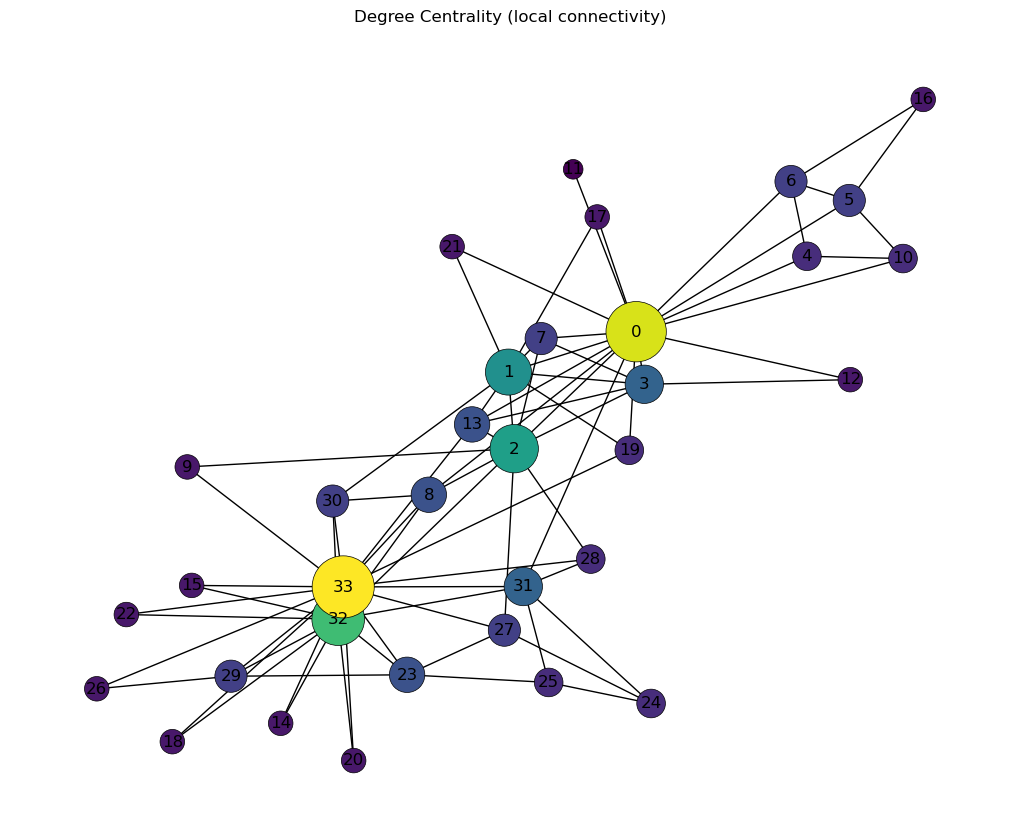

In [10]:
# ------------------------------------------------------------
# Degree Centrality
# ------------------------------------------------------------
# Degree centrality measures the fraction of nodes directly connected
# to each node (local popularity).

degree_centrality = nx.degree_centrality(G)

draw_graph_with_centrality(
    G,
    degree_centrality,
    title="Degree Centrality (local connectivity)",
    pos=pos
)

## Visualizing Closeness Centrality

We now visualize **closeness centrality**, a measure that captures how
*globally reachable* a node is within the network.

In this visualization:
- node **size** and **color** represent the closeness centrality value,
- nodes with larger values are, on average, at **shorter shortest-path
  distances** from all other nodes.

Nodes with high closeness centrality are well positioned to
**spread information efficiently**, since they can reach the rest of the
network using relatively few hops. Unlike degree centrality, this measure
accounts for the **global structure** of the graph, not just local
connections.

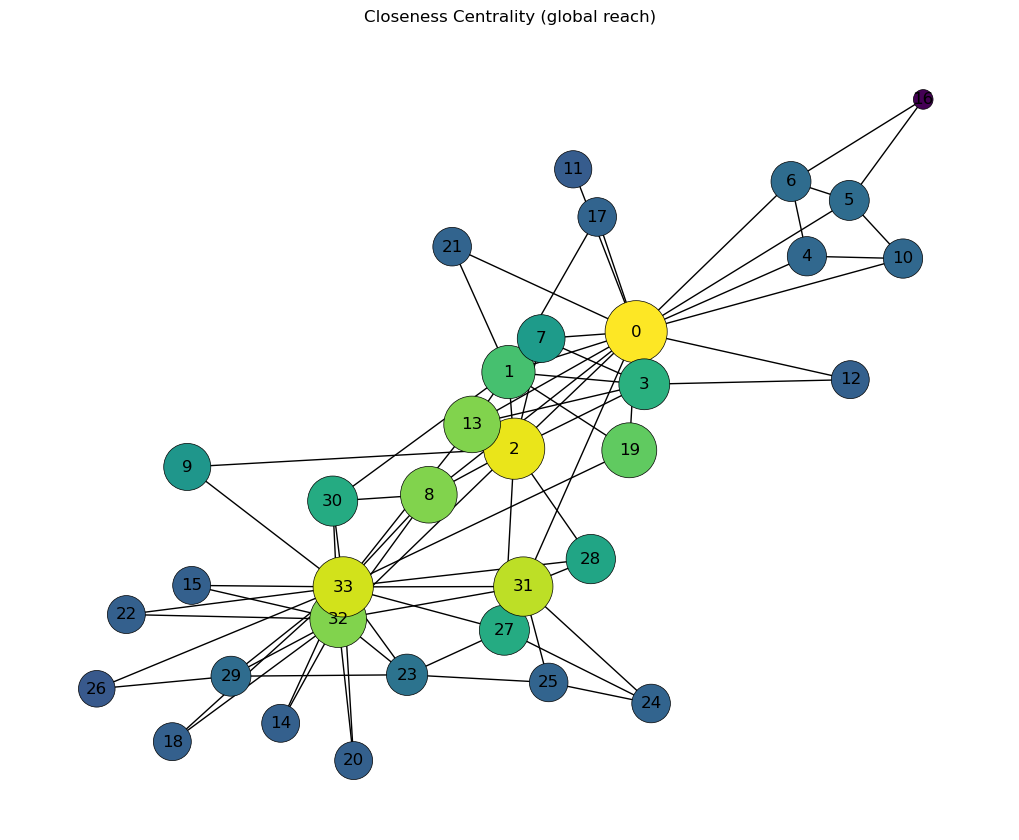

In [11]:
# ------------------------------------------------------------
# Closeness Centrality
# ------------------------------------------------------------
# Closeness centrality measures how close a node is, on average,
# to all other nodes via shortest paths (global reach).

closeness_centrality = nx.closeness_centrality(G)

draw_graph_with_centrality(
    G,
    closeness_centrality,
    title="Closeness Centrality (global reach)",
    pos=pos
)

## Visualizing Node Betweenness Centrality

We now visualize **node betweenness centrality**, which highlights nodes
that frequently act as **bridges** along shortest paths between other
pairs of nodes in the network.

In this visualization:
- node **size** and **color** represent the node betweenness centrality,
- nodes with larger values lie on a large fraction of shortest paths
  connecting other nodes.

Such nodes play an important **brokerage role**: even if they are not
highly connected or centrally located, they can exert significant
influence over the **flow of information** by controlling key routes
between different parts of the network. Removing or disabling such nodes
can strongly affect connectivity and communication.

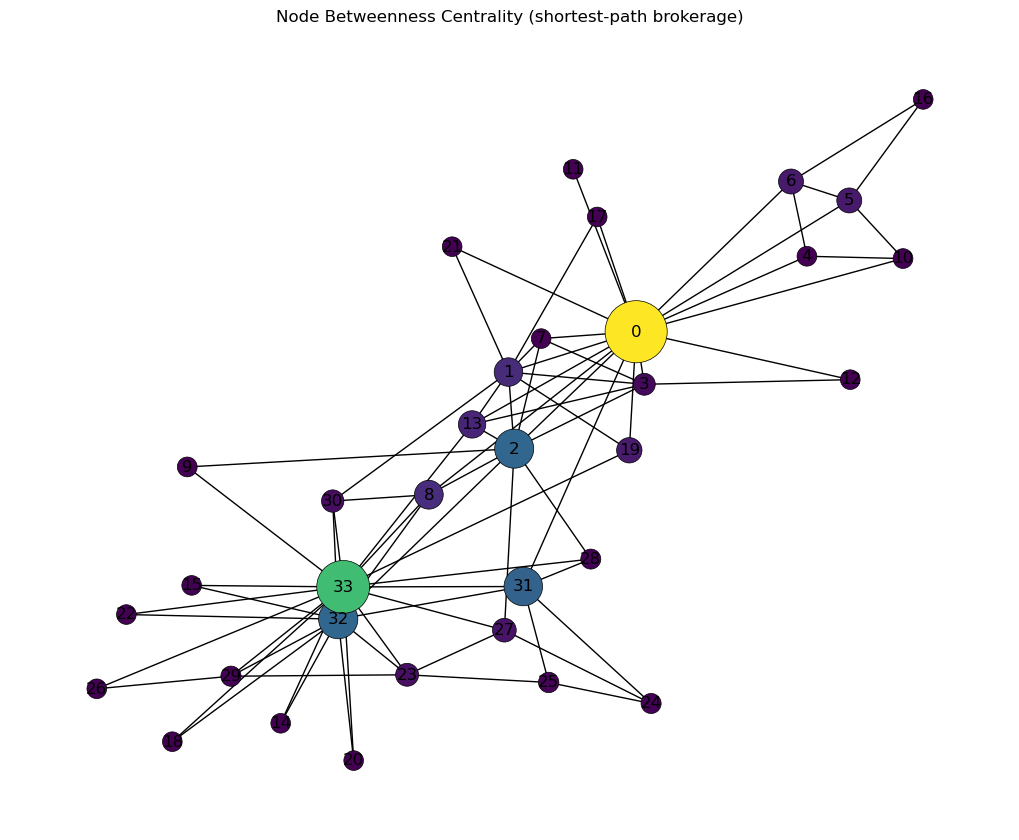

In [12]:
# ------------------------------------------------------------
# Node Betweenness Centrality
# ------------------------------------------------------------
# Node betweenness centrality measures how often a node lies
# on shortest paths between pairs of other nodes (brokerage role).

node_betweenness_centrality = nx.betweenness_centrality(G)

draw_graph_with_centrality(
    G,
    node_betweenness_centrality,
    title="Node Betweenness Centrality (shortest-path brokerage)",
    pos=pos
)

## Visualizing Edge Betweenness Centrality

We now shift our attention from **node-level** importance to
**edge-level** importance by visualizing **edge betweenness centrality**.

Edge betweenness centrality measures how often an **edge** lies on
shortest paths between pairs of nodes. Edges with high betweenness
centrality act as **critical bridges**: many shortest paths rely on them
to connect different regions of the network.

In the visualization below:
- **nodes** are drawn with uniform size and color, to keep the focus on edges,
- **edge color** reflects the edge betweenness centrality value,
- **edge width** also scales with edge betweenness centrality.

Edges that appear thicker and more intensely colored are structurally
important for maintaining connectivity and facilitating shortest-path
traffic through the network.

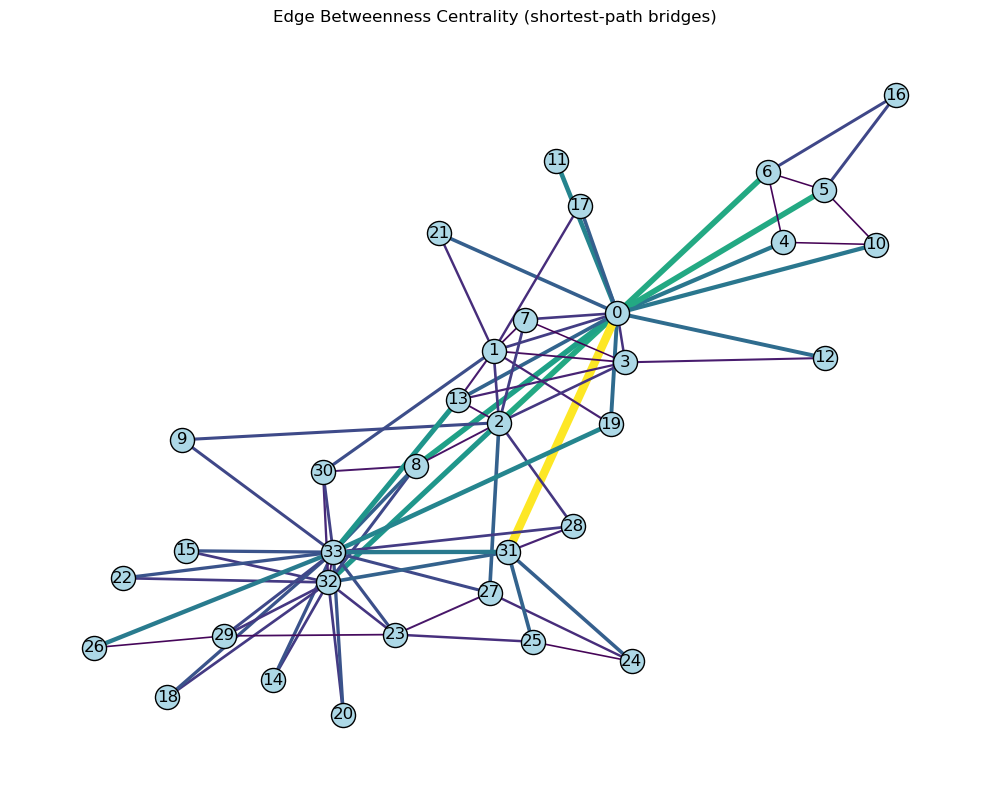

In [13]:
# ------------------------------------------------------------
# Edge Betweenness Centrality
# ------------------------------------------------------------
# Edge betweenness centrality measures how often an edge lies
# on shortest paths between pairs of nodes (edge-level brokerage).

edge_betweenness = nx.edge_betweenness_centrality(G)

# Normalize values for visualization (map to [0,1])
max_ebc = max(edge_betweenness.values())
normalized_ebc = {e: v / max_ebc for e, v in edge_betweenness.items()}

plt.figure(figsize=(10, 8))

# Draw nodes (kept uniform to emphasize edges)
nx.draw_networkx_nodes(
    G,
    pos,
    node_color="lightblue",
    node_size=300,
    edgecolors="black"
)

# Draw edges with color and width proportional to edge betweenness
edges, ebc_values = zip(*normalized_ebc.items())
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges,
    edge_color=ebc_values,
    edge_cmap=plt.cm.viridis,
    width=[1 + 5 * v for v in ebc_values]
)

# Draw node labels
nx.draw_networkx_labels(G, pos)

plt.title("Edge Betweenness Centrality (shortest-path bridges)")
plt.axis("off")
plt.tight_layout()
plt.show()

## Visualizing Flow-Based Edge Centrality

Edge betweenness centrality is based on **shortest paths**. In contrast, a
**flow-based edge centrality** measures how important an edge is when traffic
is allowed to **split across multiple paths**.

Idea:
1. For each pair of nodes $(s,t)$, solve a **maximum flow** problem from $s$ to $t$.
2. Look at the resulting flow values on each edge.
3. Accumulate how much total flow passes through each edge across many $(s,t)$ pairs.

Edges that consistently carry a large amount of flow across many source--sink
pairs are structurally important for sustaining distributed traffic, not just
shortest-path traffic.

In this notebook, we treat each edge as having **unit capacity** (capacity $=1$),
so the max-flow value corresponds to the number of edge-disjoint routes
available between nodes.

Computed flow-based edge centrality (max-flow aggregation).
  number of edges: 78


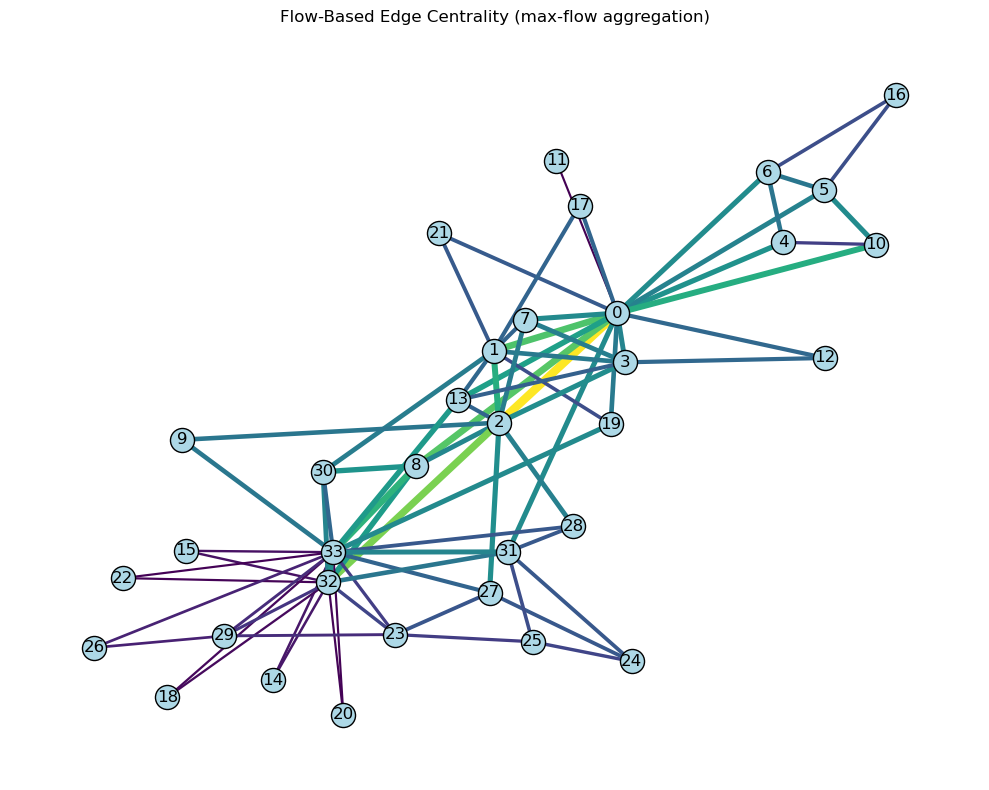

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# ------------------------------------------------------------
# Flow-based edge centrality (max-flow aggregation)
# ------------------------------------------------------------
# For Karate Club (small graph), we can compute max-flow for all pairs.
# We treat each edge as having capacity 1.
# For each (s,t), we compute a max flow and accumulate the amount of flow
# that passes through each undirected edge.

# Build a directed version of G with symmetric edges and unit capacities
G_cap = nx.DiGraph()
for u, v in G.edges():
    G_cap.add_edge(u, v, capacity=1.0)
    G_cap.add_edge(v, u, capacity=1.0)

nodes_list = list(G.nodes())
edge_flow_centrality = defaultdict(float)

# Compute max-flow for all unordered pairs (s < t)
for idx_s, s in enumerate(nodes_list):
    for t in nodes_list[idx_s + 1:]:
        flow_value, flow_dict = nx.maximum_flow(G_cap, s, t, capacity="capacity")

        # Accumulate flow on undirected edges: sum flow(u->v) and flow(v->u)
        # Note: flow_dict[u][v] is the flow along directed edge u->v in the chosen max-flow solution.
        for u in flow_dict:
            for v, f_uv in flow_dict[u].items():
                if f_uv == 0:
                    continue
                e = (min(u, v), max(u, v))
                edge_flow_centrality[e] += float(abs(f_uv))

print("Computed flow-based edge centrality (max-flow aggregation).")
print(f"  number of edges: {len(edge_flow_centrality)}")

# Normalize for visualization (map to [0,1])
max_val = max(edge_flow_centrality.values()) if edge_flow_centrality else 1.0
edge_flow_centrality_norm = {e: val / max_val for e, val in edge_flow_centrality.items()}

# ------------------------------------------------------------
# Visualization: color and width proportional to flow-based centrality
# ------------------------------------------------------------
plt.figure(figsize=(10, 8))

# Draw nodes uniformly (focus on edges)
nx.draw_networkx_nodes(
    G, pos,
    node_color="lightblue",
    node_size=300,
    edgecolors="black"
)

# Draw edges with flow-based centrality (color + width)
edges_und = list(G.edges())
values = []
for (u, v) in edges_und:
    e = (min(u, v), max(u, v))
    values.append(edge_flow_centrality_norm.get(e, 0.0))

nx.draw_networkx_edges(
    G, pos,
    edgelist=edges_und,
    edge_color=values,
    edge_cmap=plt.cm.viridis,
    width=[1 + 5 * val for val in values]
)

nx.draw_networkx_labels(G, pos)
plt.title("Flow-Based Edge Centrality (max-flow aggregation)")
plt.axis("off")
plt.tight_layout()
plt.show()

## Comparing Node Centralities Side by Side

So far we have visualized three **node-level** centrality measures separately:

- **Degree centrality** (local popularity),
- **Closeness centrality** (global reach via shortest paths),
- **Node betweenness centrality** (brokerage on shortest-path traffic).

To better compare them, we now place the three visualizations **side by side**
using the **same node positions**.

### Important note about scaling
Different centrality measures have very different numerical ranges. To make the
side-by-side plots visually comparable, we normalize each node centrality
by its **average value** across nodes and then scale node size and color using
these normalized values.

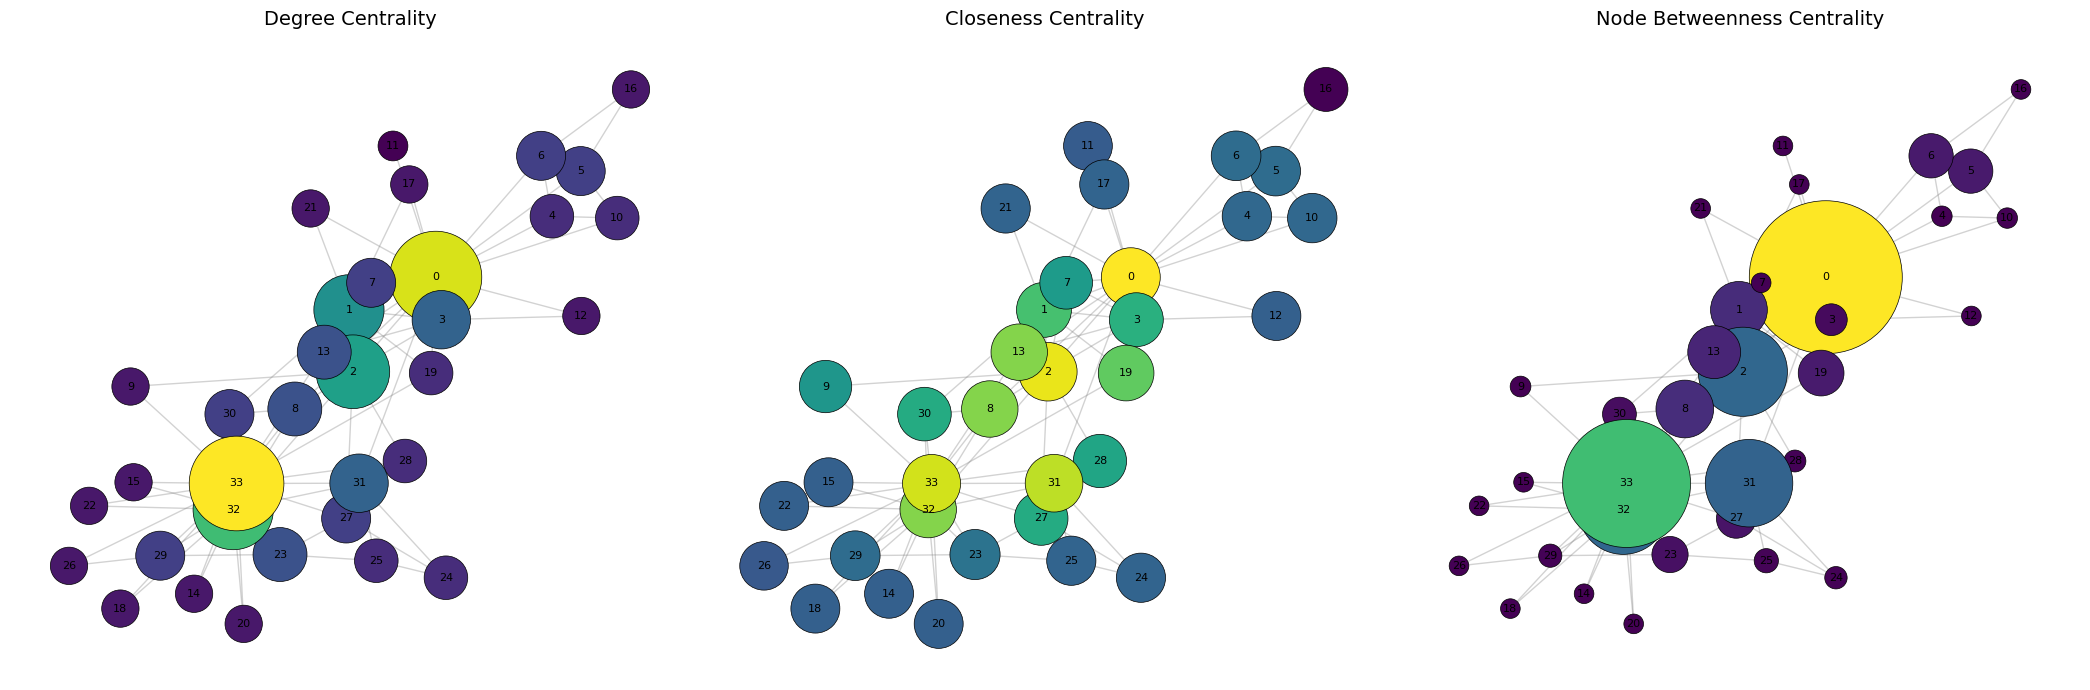

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# ------------------------------------------------------------
# Compute average values for normalization (node-level only)
# ------------------------------------------------------------
avg_degree = np.mean(list(degree_centrality.values()))
avg_closeness = np.mean(list(closeness_centrality.values()))
avg_node_betweenness = np.mean(list(node_betweenness_centrality.values()))

# ------------------------------------------------------------
# Plot settings (nodes only; edges kept uniform for now)
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharex=True, sharey=True)


def draw_node_centrality_panel(ax, G, pos, centrality_dict, norm_const, title):
    """
    Draw one panel where node size and color reflect a centrality measure.
    Edges are drawn uniformly to keep focus on node centralities.
    """
    nodes = list(G.nodes())

    # Normalize centrality by its average (values > 1 are above average)
    vals = np.array([centrality_dict[v] / norm_const for v in nodes], dtype=float)

    # Map to node sizes (ensure a minimum size so all nodes remain visible)
    node_sizes = 200 + 1200 * vals

    # Draw edges uniformly
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.35, width=1.0, edge_color="gray")

    # Draw nodes with centrality-based color and size
    nx.draw_networkx_nodes(
        G, pos, ax=ax,
        node_size=node_sizes,
        node_color=vals,
        cmap=plt.cm.viridis,
        edgecolors="black",
        linewidths=0.5
    )

    # Labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=8)

    ax.set_title(title, fontsize=14)
    ax.axis("off")


# Degree centrality panel
draw_node_centrality_panel(
    axes[0], G, pos,
    degree_centrality, avg_degree,
    title="Degree Centrality"
)

# Closeness centrality panel
draw_node_centrality_panel(
    axes[1], G, pos,
    closeness_centrality, avg_closeness,
    title="Closeness Centrality"
)

# Node betweenness centrality panel
draw_node_centrality_panel(
    axes[2], G, pos,
    node_betweenness_centrality, avg_node_betweenness,
    title="Node Betweenness Centrality"
)

plt.tight_layout()
plt.show()

## Comparing Edge Centralities Side by Side
### Shortest-Path Edge Betweenness vs. Flow-Based Edge Centrality

We now compare two **edge-level** centrality measures on Zachary's Karate Club network:

1. **Edge betweenness centrality (shortest-path based)**
   Measures how often an edge lies on shortest paths between node pairs.
   Edges with high values are critical for **shortest-path traffic**.

2. **Flow-based edge centrality (max-flow based)**
   Measures how important an edge is when traffic can **split across multiple paths**.
   For each source--sink pair $(s,t)$, we compute a max flow (with unit capacities),
   and accumulate how much flow passes through each edge.

In the figure below we plot both measures side by side using the same node positions:
- nodes are drawn uniformly (to keep focus on edges),
- edge color and thickness represent the corresponding edge centrality values.

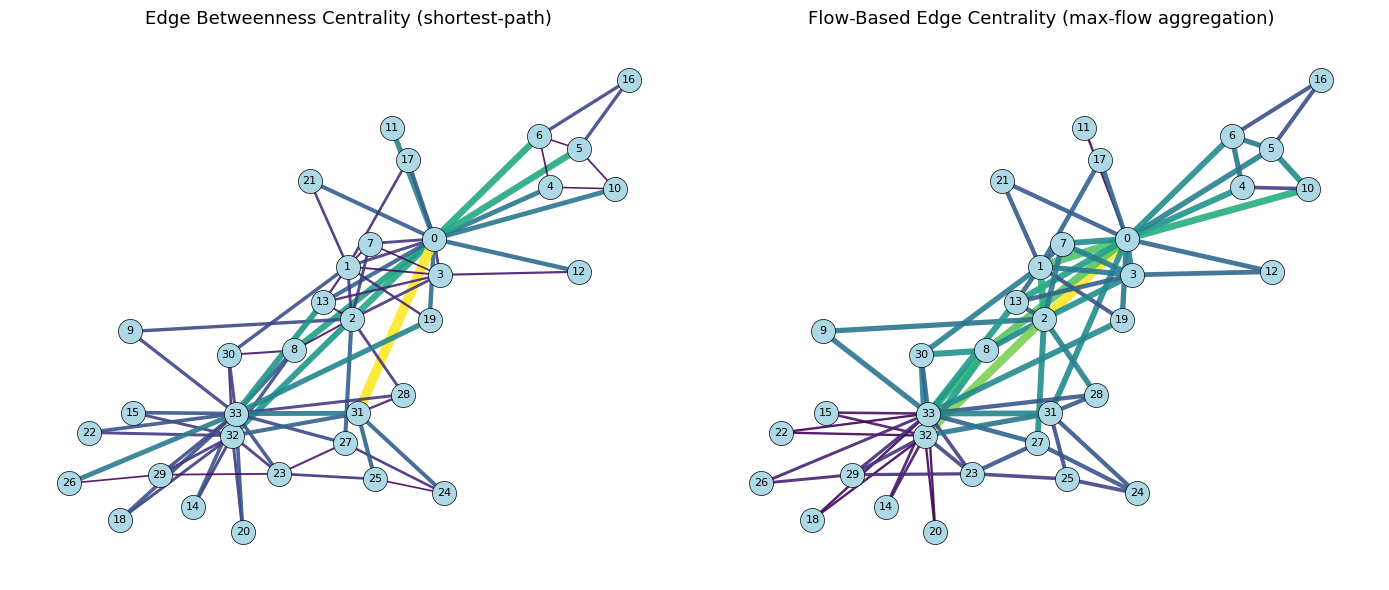

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# ------------------------------------------------------------
# 1) Edge betweenness centrality (shortest-path based)
# ------------------------------------------------------------
edge_betw = nx.edge_betweenness_centrality(G)  # dict keyed by (u,v) edges

# Normalize to [0,1] for visualization
max_betw = max(edge_betw.values()) if edge_betw else 1.0
edge_betw_norm = {e: (v / max_betw) for e, v in edge_betw.items()}

# ------------------------------------------------------------
# 2) Flow-based edge centrality (max-flow aggregation, unit capacities)
# ------------------------------------------------------------
# Build a directed capacity graph with symmetric edges and capacity=1
G_cap = nx.DiGraph()
for u, v in G.edges():
    G_cap.add_edge(u, v, capacity=1.0)
    G_cap.add_edge(v, u, capacity=1.0)

nodes_list = list(G.nodes())
edge_flow = defaultdict(float)

# Compute max-flow for all unordered pairs (s < t)
for idx_s, s in enumerate(nodes_list):
    for t in nodes_list[idx_s + 1:]:
        flow_value, flow_dict = nx.maximum_flow(G_cap, s, t, capacity="capacity")

        # Accumulate absolute flow on undirected edges
        for u in flow_dict:
            for v, f_uv in flow_dict[u].items():
                if f_uv == 0:
                    continue
                e = (min(u, v), max(u, v))
                edge_flow[e] += float(abs(f_uv))

# Normalize to [0,1]
max_flow = max(edge_flow.values()) if edge_flow else 1.0
edge_flow_norm = {e: (v / max_flow) for e, v in edge_flow.items()}


# ------------------------------------------------------------
# Visualization helper: draw edges with color + width from an edge-score dict
# ------------------------------------------------------------
def draw_edge_centrality_panel(ax, G, pos, edge_score_norm, title):
    # Use the graph edge list and pull scores in that order
    edges_und = list(G.edges())
    vals = []
    for (u, v) in edges_und:
        e = (min(u, v), max(u, v))
        vals.append(edge_score_norm.get(e, 0.0))
    vals = np.array(vals, dtype=float)

    # Nodes are uniform for this comparison
    nx.draw_networkx_nodes(
        G, pos, ax=ax,
        node_color="lightblue",
        node_size=300,
        edgecolors="black",
        linewidths=0.5
    )

    # Edge width and color reflect centrality
    nx.draw_networkx_edges(
        G, pos, ax=ax,
        edgelist=edges_und,
        edge_color=vals,
        edge_cmap=plt.cm.viridis,
        width=1 + 6 * vals,
        alpha=0.9
    )

    nx.draw_networkx_labels(G, pos, ax=ax, font_size=8)
    ax.set_title(title, fontsize=13)
    ax.axis("off")


# ------------------------------------------------------------
# Side-by-side comparison
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

draw_edge_centrality_panel(
    axes[0], G, pos,
    edge_betw_norm,
    title="Edge Betweenness Centrality (shortest-path)"
)

draw_edge_centrality_panel(
    axes[1], G, pos,
    edge_flow_norm,
    title="Flow-Based Edge Centrality (max-flow aggregation)"
)

plt.tight_layout()
plt.show()

## Summary: Centrality Measures in Social Networks

In this notebook, we explored several **centrality measures** that quantify
the structural importance of nodes and edges in a social network, using
Zachary’s Karate Club as a concrete example.

### Node-level centralities
- **Degree centrality** captures *local popularity* by counting direct connections.
- **Closeness centrality** captures *global reach*, identifying nodes that can
  quickly interact with the rest of the network through short paths.
- **Node betweenness centrality** captures *brokerage*, highlighting nodes that
  frequently lie on shortest paths between other nodes and connect different
  regions of the network.

### Edge-level centralities
- **Edge betweenness centrality** identifies edges that act as *shortest-path
  bridges* for communication or traffic.
- **Flow-based edge centrality** extends this idea by allowing traffic to split
  across multiple paths, revealing edges that are important for sustaining
  *distributed flows* through the network.

### Key takeaway
Different centrality measures emphasize **different structural roles**:
local connectivity, global reach, brokerage, and robustness under load.
No single metric fully captures “importance” in a complex network, and the
appropriate choice depends on the process (information spread, traffic,
robustness) one wants to understand.

This perspective prepares us to choose centrality measures thoughtfully
when analyzing real-world networks.